In [3]:
import pandas as pd
import requests

In [4]:
api_url = "https://www.cryptingup.com/api/markets"

In [5]:
# Set up parameter dictionary
params = {"term":"exchange_id"}

In [6]:
# Query the API with params set
response=requests.get(api_url,params)

In [7]:
#Extract JSON data from response
data = response.json()

In [8]:
#Load "markets" values to a dataframe
df = pd.DataFrame(data["markets"])
print(df.head())

   exchange_id     symbol base_asset quote_asset  price_unconverted  \
0      BINANCE   BTC-USDT        BTC        USDT       40799.995000   
1      BINANCE   ETH-USDT        ETH        USDT        3024.265000   
2      BINANCE   GMT-USDT        GMT        USDT           2.465645   
3      BINANCE  BUSD-USDT       BUSD        USDT           0.999950   
4  HUOBIGLOBAL   BTC-USDT        BTC        USDT       40790.565000   

          price  change_24h    spread    volume_24h  status  \
0  40803.355672   -4.638195  0.000025  2.187822e+09  recent   
1   3024.514107   -7.682528  0.000331  1.923874e+09  recent   
2      2.465848    7.743485  0.000406  8.460533e+08  recent   
3      1.000032    0.035014  0.010000  6.315667e+08  recent   
4  40793.924895    0.517526  0.000025  6.226443e+08  recent   

                   created_at                  updated_at  
0         2021-09-21T01:21:25  2022-04-11T16:54:28.328043  
1         2021-09-21T01:21:25  2022-04-11T16:54:26.788493  
2  2022-03-13T

In [9]:
#Checking type of values
print(df.dtypes)

exchange_id           object
symbol                object
base_asset            object
quote_asset           object
price_unconverted    float64
price                float64
change_24h           float64
spread               float64
volume_24h           float64
status                object
created_at            object
updated_at            object
dtype: object


In [10]:
#Return list of currencies and their symbols
df[['exchange_id', 'symbol']]

,exchange_id,symbol
0,BINANCE,BTC-USDT
1,BINANCE,ETH-USDT
2,BINANCE,GMT-USDT
3,BINANCE,BUSD-USDT
4,HUOBIGLOBAL,BTC-USDT
...,...,...
95,HUOBIGLOBAL,TRX-USDT
96,BINANCE,AAVE-USDT
97,BINANCE,SOL-BTC
98,BINANCE,EOS-USDT


In [11]:
#Dropping all duplicate values
df.drop_duplicates(keep=False,
                  inplace=True)
df

,exchange_id,symbol,base_asset,quote_asset,price_unconverted,price,change_24h,spread,volume_24h,status,created_at,updated_at
0,BINANCE,BTC-USDT,BTC,USDT,40799.995000,40803.355672,-4.638195,0.000025,2.187822e+09,recent,2021-09-21T01:21:25,2022-04-11T16:54:28.328043
1,BINANCE,ETH-USDT,ETH,USDT,3024.265000,3024.514107,-7.682528,0.000331,1.923874e+09,recent,2021-09-21T01:21:25,2022-04-11T16:54:26.788493
2,BINANCE,GMT-USDT,GMT,USDT,2.465645,2.465848,7.743485,0.000406,8.460533e+08,recent,2022-03-13T23:05:22.863868,2022-04-11T16:54:35.264946
3,BINANCE,BUSD-USDT,BUSD,USDT,0.999950,1.000032,0.035014,0.010000,6.315667e+08,recent,2021-09-21T01:21:25,2022-04-11T16:54:28.664251
4,HUOBIGLOBAL,BTC-USDT,BTC,USDT,40790.565000,40793.924895,0.517526,0.000025,6.226443e+08,recent,2021-09-21T01:21:25,2022-04-11T16:54:31.691404
...,...,...,...,...,...,...,...,...,...,...,...,...
95,HUOBIGLOBAL,TRX-USDT,TRX,USDT,0.059147,0.059152,0.462845,0.001691,3.474932e+07,recent,2021-09-21T01:21:25,2022-04-11T16:54:25.626455
96,BINANCE,AAVE-USDT,AAVE,USDT,162.650000,162.663397,-10.435022,0.061463,3.454876e+07,recent,2021-09-21T01:21:25,2022-04-11T16:54:27.436763
97,BINANCE,SOL-BTC,SOL,BTC,0.002517,102.711935,-4.361868,0.007945,3.441822e+07,recent,2021-09-21T01:21:25,2022-04-11T16:54:28.844956
98,BINANCE,EOS-USDT,EOS,USDT,2.216500,2.216683,-8.371228,0.045106,3.436573e+07,recent,2021-09-21T01:21:25,2022-04-11T16:54:25.459668


In [12]:
#calculating number of currencies
currencies=len(df)

In [13]:
print(currencies)

100


In [14]:
#Identifying the top 10 currencies
top_10_currencies=df['exchange_id'].value_counts().head(10)
top_10_currencies.head(10)

BINANCE        69
COINBASE       13
HUOBIGLOBAL     6
BITFINEX        6
KRAKEN          6
Name: exchange_id, dtype: int64

In [16]:
#Returning top ten currencies with the highest price and volume
df.sort_values('price', ascending=False).head(10)

,exchange_id,symbol,base_asset,quote_asset,price_unconverted,price,change_24h,spread,volume_24h,status,created_at,updated_at
18,BITFINEX,BTC-USD,BTC,USD,40822.500,40822.500000,-5.024196,0.002450,2.522896e+08,recent,2021-09-21T01:21:25,2022-04-11T16:54:36.626846
52,BINANCE,BTC-EUR,BTC,EUR,37521.795,40815.519453,-4.783234,0.022411,6.695138e+07,recent,2021-09-21T01:21:25,2022-04-11T16:54:28.756571
80,BITFINEX,BTC-UST,BTC,UST,40795.500,40811.383740,-5.014086,0.066162,4.391680e+07,recent,2021-09-21T01:21:25,2022-04-11T16:54:26.799133
59,KRAKEN,XBT-EUR,BTC,EUR,37511.150,40803.940017,-4.780985,0.001866,6.057996e+07,recent,2021-09-21T01:21:25,2022-04-11T16:54:28.093801
0,BINANCE,BTC-USDT,BTC,USDT,40799.995,40803.355672,-4.638195,0.000025,2.187822e+09,recent,2021-09-21T01:21:25,2022-04-11T16:54:28.328043
63,COINBASE,BTC-EUR,BTC,EUR,37508.705,40801.280391,-4.795868,0.010477,5.857975e+07,recent,2021-09-21T01:21:25,2022-04-11T16:54:27.932546
45,BINANCE,BTC-USDC,BTC,USDC,40802.140,40799.454565,-4.667697,0.008480,7.619154e+07,recent,2021-09-21T01:21:25,2022-04-11T16:54:28.534366
7,COINBASE,BTC-USD,BTC,USD,40799.295,40799.295000,-4.677841,0.009387,5.342039e+08,recent,2021-09-21T01:21:25,2022-04-11T16:54:27.805562
35,KRAKEN,XBT-USD,BTC,USD,40798.750,40798.750000,-4.698530,0.003677,1.092128e+08,recent,2021-09-21T01:21:25,2022-04-11T16:54:26.334833
6,BINANCE,BTC-BUSD,BTC,BUSD,40801.445,40794.893600,-4.666269,0.000025,5.712397e+08,recent,2021-09-21T01:21:25,2022-04-11T16:54:36.806605


In [17]:
# Setting up plotting in Jupyter notebooks
%matplotlib inline

<AxesSubplot:xlabel='exchange_id'>

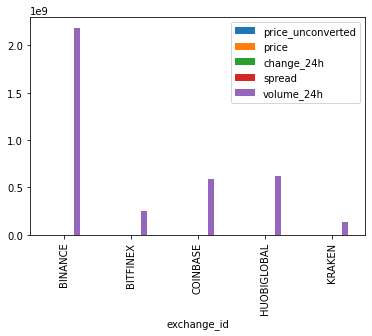

In [25]:
top_10_currencies = df.groupby('exchange_id').max()
top_10_currencies.plot.bar()

In [27]:
#Returning 10 top currencies that went up and dropped within past 24hrs:
df.sort_values('change_24h', ascending=False).head(10)

,exchange_id,symbol,base_asset,quote_asset,price_unconverted,price,change_24h,spread,volume_24h,status,created_at,updated_at
86,BINANCE,DEGO-USDT,DEGO,USDT,4.055000,4.055334,22.507553,0.246305,3.996601e+07,recent,2021-09-21T01:21:25,2022-04-11T16:54:30.337742
2,BINANCE,GMT-USDT,GMT,USDT,2.465645,2.465848,7.743485,0.000406,8.460533e+08,recent,2022-03-13T23:05:22.863868,2022-04-11T16:54:35.264946
21,BINANCE,GMT-BUSD,GMT,BUSD,2.465465,2.465069,7.716320,0.026361,1.859837e+08,recent,2022-03-13T23:05:22.862219,2022-04-11T16:54:35.317307
75,HUOBIGLOBAL,SOL-USDT,SOL,USDT,102.665550,102.674007,1.194984,0.029314,4.761162e+07,recent,2021-09-21T01:21:25,2022-04-11T16:54:32.593987
78,HUOBIGLOBAL,NFT-USDT,NFT,USDT,0.000002,0.000002,1.079921,0.044374,4.493174e+07,recent,2021-09-21T01:21:25,2022-04-11T16:54:36.733388
9,HUOBIGLOBAL,ETH-USDT,ETH,USDT,3023.345000,3023.594031,0.668103,0.000331,3.827278e+08,recent,2021-09-21T01:21:25,2022-04-11T16:54:25.457085
4,HUOBIGLOBAL,BTC-USDT,BTC,USDT,40790.565000,40793.924895,0.517526,0.000025,6.226443e+08,recent,2021-09-21T01:21:25,2022-04-11T16:54:31.691404
95,HUOBIGLOBAL,TRX-USDT,TRX,USDT,0.059147,0.059152,0.462845,0.001691,3.474932e+07,recent,2021-09-21T01:21:25,2022-04-11T16:54:25.626455
34,HUOBIGLOBAL,LUNA-USDT,LUNA,USDT,85.976150,85.983232,0.404005,0.032911,1.129357e+08,recent,2021-09-21T01:21:25,2022-04-11T16:54:31.854093
85,BINANCE,EUR-USDT,EUR,USDT,1.087500,1.087590,0.230415,0.091912,4.089367e+07,recent,2021-09-21T01:21:25,2022-04-11T16:54:28.691927


In [29]:
df.sort_values('change_24h', ascending=True).head(10)

,exchange_id,symbol,base_asset,quote_asset,price_unconverted,price,change_24h,spread,volume_24h,status,created_at,updated_at
89,BINANCE,DREP-USDT,DREP,USDT,1.07025,1.070338,-16.712062,0.140056,3.707964e+07,recent,2021-09-21T01:21:25,2022-04-11T16:54:26.954461
64,COINBASE,JASMY-USD,JASMY,USD,0.02214,0.022140,-15.560641,0.180505,5.740561e+07,recent,2021-10-12T21:19:56.825362,2022-04-11T16:54:27.860510
49,BINANCE,JASMY-USDT,JASMY,USDT,0.02205,0.022052,-15.517241,0.452489,7.142147e+07,recent,2021-11-22T13:11:03.143971,2022-04-11T16:54:29.732222
84,BINANCE,GLMR-USDT,GLMR,USDT,3.56535,3.565644,-15.185432,0.053277,4.157022e+07,recent,2022-01-12T09:31:59.316435,2022-04-11T16:54:25.840388
61,BINANCE,RUNE-USDT,RUNE,USDT,7.93100,7.931653,-14.564257,0.025214,5.890878e+07,recent,2021-09-21T01:21:25,2022-04-11T16:54:28.986054
50,BINANCE,ASTR-USDT,ASTR,USDT,0.26000,0.260021,-14.558002,0.153728,7.085455e+07,recent,2022-03-13T23:05:22.899068,2022-04-11T16:54:25.658233
94,BINANCE,BSW-USDT,BSW,USDT,1.10565,1.105741,-13.890187,0.063291,3.484565e+07,recent,2022-03-27T17:36:56.411123,2022-04-11T16:54:26.360568
46,BINANCE,SLP-USDT,SLP,USDT,0.01665,0.016651,-12.827225,0.598802,7.368677e+07,recent,2021-09-21T01:21:25,2022-04-11T16:54:29.395558
83,BINANCE,RARE-USDT,RARE,USDT,0.59150,0.591549,-12.240356,0.168919,4.187304e+07,recent,2021-10-12T21:19:56.850729,2022-04-11T16:54:25.715845
56,BINANCE,FIL-USDT,FIL,USDT,19.06500,19.066570,-11.325581,0.052438,6.368393e+07,recent,2021-09-21T01:21:25,2022-04-11T16:54:36.826064
